✓ NLTK stopwords downloaded successfully
Loading dataset...
✓ Dataset loaded successfully with 225002 rows

Initial dataset information:
Shape: (225002, 5)
Columns: ['userName', 'content', 'score', 'at', 'appVersion']

Sample data:
                  userName  \
0                Yuga Edit   
1                 ff burik   
2  Anisa Suci Rahmayuliani   

                                                                                               content  \
0                                                                              akun gopay saya di blok   
1                                            Lambat sekali sekarang ini bosssku apk gojek gk kaya dulu   
2  Kenapa sih dari kemarin sy buka aplikasi gojek malah keluar sendiri terus Saya kasih bintang 2 d...   

   score                   at appVersion  
0      1  2022-01-21 10:52:12      4.9.3  
1      3  2021-11-30 15:40:38      4.9.3  
2      4  2021-11-29 22:58:12      4.9.3  

1. Performing sentiment labeling...

Sentiment di

  0%|          | 0/225002 [00:00<?, ?it/s]


3. Normalizing text...


  0%|          | 0/225002 [00:00<?, ?it/s]


4. Tokenizing and removing stopwords...


  0%|          | 0/225002 [00:00<?, ?it/s]


5. Stemming text...


  0%|          | 0/225002 [00:00<?, ?it/s]


Saving processed dataset...
✓ Processed dataset saved to data/GojekAppReview_Processed.csv

Final dataset preview:
                  userName  \
0                Yuga Edit   
1                 ff burik   
2  Anisa Suci Rahmayuliani   
3             naoki yakuza   
4            Trio Sugianto   

                                                                                               content  \
0                                                                              akun gopay saya di blok   
1                                            Lambat sekali sekarang ini bosssku apk gojek gk kaya dulu   
2  Kenapa sih dari kemarin sy buka aplikasi gojek malah keluar sendiri terus Saya kasih bintang 2 d...   
3  Baru download gojek dan hape baru trus ditop u gopay transaksi dialfamart transaksi bloked trans...   
4                                                                                               Mantap   

   score                   at appVersion sentiment  \
0      1  20

C:\Users\ACER\AppData\Local\Temp\ipykernel_7856\3379171520.py:266: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='viridis')


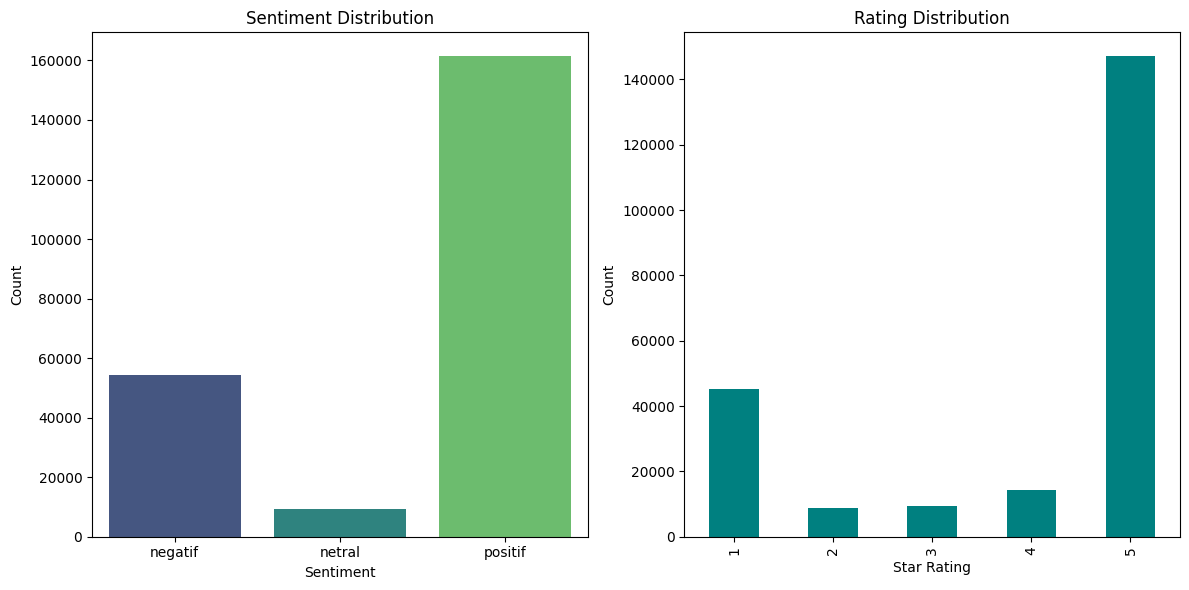

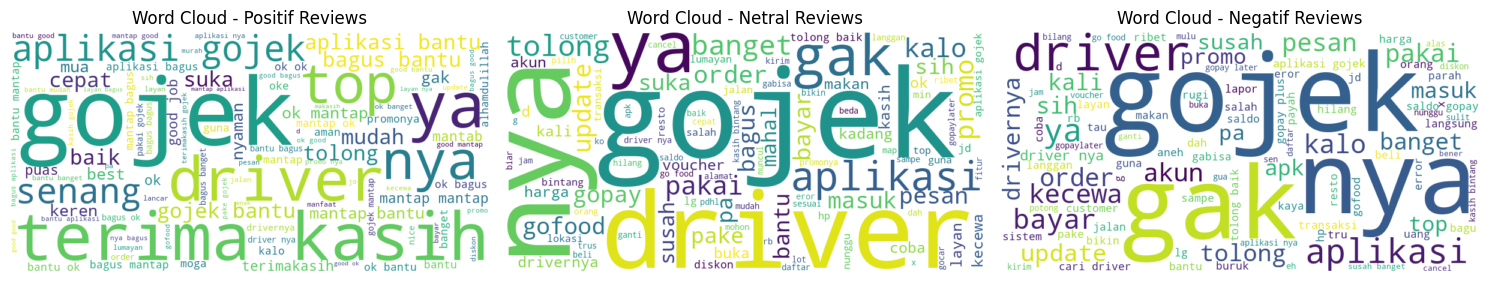


Preparing final dataset for saving...

Saving processed dataset...
✓ Processed dataset saved with timestamp: data/GojekAppReview_Processed_20250524_150906.csv
✓ Processed dataset also saved as: data/GojekAppReview_Processed.csv
✓ Complete processed dataset (with all preprocessing steps) saved as: data/GojekAppReview_Processed_Full.csv

Final dataset preview (requested format):
                  userName  \
0                Yuga Edit   
1                 ff burik   
2  Anisa Suci Rahmayuliani   
3             naoki yakuza   
4            Trio Sugianto   

                                                                                               content  \
0                                                                              akun gopay saya di blok   
1                                            Lambat sekali sekarang ini bosssku apk gojek gk kaya dulu   
2  Kenapa sih dari kemarin sy buka aplikasi gojek malah keluar sendiri terus Saya kasih bintang 2 d...   
3  Baru downlo

In [1]:
import pandas as pd
import re
import emoji
import time
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns

# Set pandas display options for better visualization
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

# Start timing
start_time = time.time()

# Function to create a simple progress indicator as fallback
def simple_progress(iterable, desc=None):
    """Simple progress indicator if tqdm is not available"""
    if desc:
        print(f"{desc}...")
    return iterable

# Try to use tqdm, fall back to simple progress if not available
try:
    from tqdm.notebook import tqdm
    from tqdm import tqdm as tqdm_std
    tqdm_available = True
    
    # Check if we're in a notebook environment
    try:
        from IPython import get_ipython
        if get_ipython() is not None and 'IPKernelApp' in get_ipython().config:
            # We're in a notebook, try to use pandas progress_apply
            try:
                tqdm.pandas()
                use_progress_apply = True
            except:
                use_progress_apply = False
        else:
            use_progress_apply = False
    except:
        use_progress_apply = False
        
except ImportError:
    tqdm_available = False
    use_progress_apply = False
    tqdm = simple_progress
    tqdm_std = simple_progress

# Download required NLTK resources
print("Downloading NLTK resources...")
try:
    nltk.download('stopwords', quiet=True)
    print("✓ NLTK stopwords downloaded successfully")
except Exception as e:
    print(f"Error downloading NLTK resources: {e}")

# Load the dataset
try:
    print("Loading dataset...")
    file_path = "data/GojekAppReview_1.csv"
    df = pd.read_csv(file_path)
    print(f"✓ Dataset loaded successfully with {len(df)} rows")
except Exception as e:
    print(f"Error loading dataset: {e}")
    raise

# Display initial dataset info
print("\nInitial dataset information:")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nSample data:")
print(df.head(3))

# 1. SENTIMENT LABELING
print("\n1. Performing sentiment labeling...")

def label_sentiment(score):
    """Label reviews based on their score"""
    if score >= 4:
        return 'positif'
    elif score == 3:
        return 'netral'
    else:
        return 'negatif'

df['sentiment'] = df['score'].apply(label_sentiment)

# Sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
print(f"\nSentiment distribution:\n{sentiment_counts}")

# 2. TEXT CLEANING
print("\n2. Cleaning text...")

def clean_text(text):
    """Clean the text"""
    if not isinstance(text, str):
        return ""
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Replace emojis with empty string
    try:
        text = emoji.replace_emoji(text, replace='')
    except:
        # In case emoji module has issues
        pass
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    
    # Strip leading and trailing spaces
    text = text.strip()
    
    # Convert to lowercase
    return text.lower()

# Apply text cleaning with appropriate progress tracking
if use_progress_apply:
    df['cleaned_content'] = df['content'].progress_apply(clean_text)
else:
    print("Processing text cleaning...")
    df['cleaned_content'] = [clean_text(text) for text in tqdm(df['content'])]

# 3. WORD NORMALIZATION
print("\n3. Normalizing text...")

# Normalization dictionary
normalization_dict = {
    # Basic conversions
    "gk": "gak", "ga": "gak", "tdk": "tidak", "bgt": "banget", "dr": "dari",
    "udh": "sudah", "jg": "juga", "aja": "saja", "sy": "saya", "trs": "terus",
    "ngga": "tidak", "nggak": "tidak", "bkin": "bikin", "blm": "belum",
    "sm": "sama", "tp": "tapi", "dgn": "dengan", "krn": "karena",
    
    # Additional common Indonesian slang words
    "yg": "yang", "utk": "untuk", "dg": "dengan", "klo": "kalau", "kok": "kok",
    "gw": "saya", "gue": "saya", "lu": "kamu", "kyk": "seperti", "gmn": "bagaimana",
    "sih": "sih", "deh": "deh", "dpt": "dapat", "bs": "bisa", "sdh": "sudah",
    "ttg": "tentang", "dlm": "dalam", "kl": "kalau", "km": "kamu", "hrs": "harus",
    "mk": "maka", "scr": "secara", "spy": "supaya", "bnyk": "banyak", "slh": "salah",
    "krna": "karena", "mw": "mau", "pk": "pakai", "pke": "pakai", "tq": "terima kasih",
    "thx": "terima kasih", "gpp": "tidak apa-apa", "gampng": "gampang", "bwt": "buat",
    "skrng": "sekarang", "skrg": "sekarang", "msh": "masih", "bnr": "benar",
    "trims": "terima kasih", "gk": "tidak", "gak": "tidak", "udah": "sudah",
    "pgen": "ingin", "pgn": "ingin", "kyk": "seperti", "gitu": "begitu",
    "gini": "begini", "gmana": "bagaimana", "gimana": "bagaimana", "gt": "begitu",
    "yah": "ya", "karna": "karena", "dri": "dari", "tdk": "tidak",
    "knp": "kenapa", "kpn": "kapan", "nih": "ini", "spt": "seperti",
    "ntaps": "mantap", "mantul": "mantap", "mantap": "mantap"
}

def normalize_text(text):
    """Normalize Indonesian informal words"""
    if not isinstance(text, str):
        return ""
    
    words = text.split()
    normalized_words = [normalization_dict.get(word, word) for word in words]
    return ' '.join(normalized_words)

# Apply normalization with appropriate progress tracking
if use_progress_apply:
    df['normalized_content'] = df['cleaned_content'].progress_apply(normalize_text)
else:
    print("Processing text normalization...")
    df['normalized_content'] = [normalize_text(text) for text in tqdm(df['cleaned_content'])]

# 4. TOKENIZATION AND STOPWORD REMOVAL
print("\n4. Tokenizing and removing stopwords...")

# Get Indonesian stopwords
stop_words = set(stopwords.words('indonesian'))

# Add custom stopwords
custom_stopwords = {"yang", "dengan", "pada", "untuk", "dari", "di", "ke", "dan", "atau", "ini", "itu"}
stop_words.update(custom_stopwords)

def tokenize_and_remove_stopwords(text):
    """Tokenize text and remove stopwords"""
    if not isinstance(text, str):
        return ""
    
    # Simple tokenization by splitting on spaces
    tokens = text.split()
    
    # Remove stopwords
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    
    return ' '.join(filtered_tokens)

# Apply tokenization with appropriate progress tracking
if use_progress_apply:
    df['tokenized_content'] = df['normalized_content'].progress_apply(tokenize_and_remove_stopwords)
else:
    print("Processing tokenization and stopword removal...")
    df['tokenized_content'] = [tokenize_and_remove_stopwords(text) for text in tqdm(df['normalized_content'])]

# 5. STEMMING
print("\n5. Stemming text...")

# Create Sastrawi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    """Apply stemming to text using Sastrawi stemmer"""
    if not isinstance(text, str):
        return ""
    
    return stemmer.stem(text)

# Apply stemming with appropriate progress tracking
if use_progress_apply:
    df['stemmed_content'] = df['tokenized_content'].progress_apply(stem_text)
else:
    print("Processing stemming...")
    df['stemmed_content'] = [stem_text(text) for text in tqdm(df['tokenized_content'])]

# SAVE PROCESSED DATASET
print("\nSaving processed dataset...")
output_file_path = "data/GojekAppReview_Processed.csv"

try:
    df.to_csv(output_file_path, index=False)
    print(f"✓ Processed dataset saved to {output_file_path}")
except Exception as e:
    print(f"Error saving dataset: {e}")

# DISPLAY FINAL RESULTS
print("\nFinal dataset preview:")
final_columns = ['userName', 'content', 'score', 'at', 'appVersion', 'sentiment', 
                 'cleaned_content', 'normalized_content', 'tokenized_content', 'stemmed_content']
print(df[final_columns].head())

# Display a sample of processing steps for a single review
print("\nProcessing steps example for a single review:")
sample_idx = 0
print(f"Original:    {df.iloc[sample_idx]['content']}")
print(f"Cleaned:     {df.iloc[sample_idx]['cleaned_content']}")
print(f"Normalized:  {df.iloc[sample_idx]['normalized_content']}")
print(f"Tokenized:   {df.iloc[sample_idx]['tokenized_content']}")
print(f"Stemmed:     {df.iloc[sample_idx]['stemmed_content']}")
print(f"Sentiment:   {df.iloc[sample_idx]['sentiment']}")

# Calculate and display processing time
end_time = time.time()
execution_time = end_time - start_time
print(f"\nExecution time: {execution_time:.2f} seconds")

# Optional: Data visualization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
df['score'].value_counts().sort_index().plot(kind='bar', color='teal')
plt.title('Rating Distribution')
plt.xlabel('Star Rating')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Optional: Word clouds for each sentiment
try:
    from wordcloud import WordCloud
    
    plt.figure(figsize=(15, 12))
    
    for i, sentiment in enumerate(['positif', 'netral', 'negatif']):
        plt.subplot(1, 3, i+1)
        
        # Combine all stemmed content for the sentiment
        text = ' '.join(df[df['sentiment'] == sentiment]['stemmed_content'].dropna())
        
        if text:
            wordcloud = WordCloud(width=800, height=400, background_color='white', 
                                  max_words=100, contour_width=3, contour_color='steelblue').generate(text)
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.title(f'Word Cloud - {sentiment.capitalize()} Reviews')
            plt.axis('off')
    
    plt.tight_layout()
    plt.show()
except ImportError:
    print("Note: WordCloud not installed. To visualize word clouds, install with: pip install wordcloud")


    # PREPARE FINAL DATASET FOR SAVING
print("\nPreparing final dataset for saving...")

# Rename sentiment column to match requested format
df = df.rename(columns={'sentiment': 'sentimenLabel'})

# Select columns for the final output as requested
final_output_columns = ['userName', 'content', 'score', 'at', 'appVersion', 'sentimenLabel']
final_df = df[final_output_columns].copy()

# Create 'data' directory if it doesn't exist
import os
if not os.path.exists('data'):
    os.makedirs('data')
    print("✓ Created 'data' directory")

# Add timestamp to filename to avoid overwriting
from datetime import datetime
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
output_file_path = f"data/GojekAppReview_Processed_{timestamp}.csv"

# Also save a copy with a standard name for easy reference
standard_output_path = "data/GojekAppReview_Processed.csv"

# SAVE PROCESSED DATASET
print("\nSaving processed dataset...")

try:
    # Save timestamped version
    final_df.to_csv(output_file_path, index=False)
    print(f"✓ Processed dataset saved with timestamp: {output_file_path}")
    
    # Save standard version
    final_df.to_csv(standard_output_path, index=False)
    print(f"✓ Processed dataset also saved as: {standard_output_path}")
    
    # Save full processed version with all preprocessing columns
    full_output_path = "data/GojekAppReview_Processed_Full.csv"
    df.to_csv(full_output_path, index=False)
    print(f"✓ Complete processed dataset (with all preprocessing steps) saved as: {full_output_path}")
    
except Exception as e:
    print(f"Error saving dataset: {e}")

# Display final results
print("\nFinal dataset preview (requested format):")
print(final_df.head())

# Summary statistics
print("\nDataset summary:")
print(f"Total reviews: {len(final_df)}")
sentiment_counts = final_df['sentimenLabel'].value_counts()
print(f"Sentiment distribution: {dict(sentiment_counts)}")

# Calculate and display processing time
end_time = time.time()
execution_time = end_time - start_time
print(f"\nExecution time: {execution_time:.2f} seconds")